# Capstone F1 Week 3 - Model Testing & Local Exploitation

## Success Story: Week 2 Achieved Rank 1!

**Week 1:** 0.000000 (rank 9/11)  
**Week 2:** 0.000001 (rank 1/12) 🥇  
**Strategy:** Test multiple models, exploit Week 2 success  
**Goal:** Refine the rank 1 point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel, WhiteKernel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
print('='*80)
print('CAPSTONE F1 WEEK 3 - MODEL TESTING + LOCAL EXPLOITATION')
print('='*80)

CAPSTONE F1 WEEK 3 - MODEL TESTING + LOCAL EXPLOITATION


## Load Data

In [2]:
X = np.load('f1_w3_inputs.npy')
Y = np.load('f1_w3_outputs.npy')

print(f'Data: {len(X)} samples, {X.shape[1]}D')
print(f'n/p: {len(X)/X.shape[1]:.2f}')

w2_idx = np.argmax(Y)
w2_pt = X[w2_idx]
w2_val = Y[w2_idx]

w1_pt = X[-2]
w1_val = Y[-2]
w1_rank = (Y >= w1_val).sum()

print(f'\nWeek 1: {w1_val:.8f} (rank {w1_rank})')
print(f'Week 2: {w2_val:.8f} (rank 1) 🥇')
print(f'\nWeek 2 point: {w2_pt}')
print(f'\n✓ Week 2 achieved RANK 1!')

Data: 12 samples, 2D
n/p: 6.00

Week 1: 0.00000000 (rank 9)
Week 2: 0.00000088 (rank 1) 🥇

Week 2 point: [0.684233 0.704244]

✓ Week 2 achieved RANK 1!


## Strategy Overview

In [3]:
print('\n' + '='*80)
print('STRATEGY: MODEL TESTING + LOCAL EXPLOITATION')
print('='*80)

print(f'\n📊 Performance:')
print(f'   Week 1: {w1_val:.8f} (rank {w1_rank} - poor)')
print(f'   Week 2: {w2_val:.8f} (rank 1 - SUCCESS!)')
print(f'   Improvement: From rank {w1_rank} to rank 1!')

print(f'\n🎯 Week 3 Strategy: LOCAL EXPLOITATION')

print(f'\n   Why Local Exploitation?')
print(f'   ✓ Week 2 achieved rank 1 (best point found)')
print(f'   ✓ Small refinements around success')
print(f'   ✓ Standard Bayesian Optimization for rank 1')

print(f'\n🔬 Model Testing Approach:')
print(f'   Challenge: Only 12 samples (small dataset)')
print(f'   n/p ratio: {len(X)/X.shape[1]:.2f} (good for models)')
print(f'   ')
print(f'   Test multiple model types:')
print(f'   • Linear SVM (baseline)')
print(f'   • RBF SVM (non-linear)')
print(f'   • Decision Trees (simple, interpretable)')
print(f'   • Random Forest (ensemble)')
print(f'   • Gradient Boosting (powerful)')
print(f'   ')
print(f'   Pick best model by cross-validation')
print(f'   Fall back to Pure GP if all fail (<60%)')

print(f'\n📍 Candidate Generation:')
print(f'   50% Best Model-approved (if reliable)')
print(f'   30% LOCAL around Week 2 (rank 1)')
print(f'   20% RANDOM exploration')

print(f'\n💡 Expected Outcome:')
print(f'   Distance from W2: 0.05-0.15 (close refinement)')
print(f'   Goal: Small improvement OR confirm W2 is local max')

print('\n' + '='*80)


STRATEGY: MODEL TESTING + LOCAL EXPLOITATION

📊 Performance:
   Week 1: 0.00000000 (rank 9 - poor)
   Week 2: 0.00000088 (rank 1 - SUCCESS!)
   Improvement: From rank 9 to rank 1!

🎯 Week 3 Strategy: LOCAL EXPLOITATION

   Why Local Exploitation?
   ✓ Week 2 achieved rank 1 (best point found)
   ✓ Small refinements around success
   ✓ Standard Bayesian Optimization for rank 1

🔬 Model Testing Approach:
   Challenge: Only 12 samples (small dataset)
   n/p ratio: 6.00 (good for models)
   
   Test multiple model types:
   • Linear SVM (baseline)
   • RBF SVM (non-linear)
   • Decision Trees (simple, interpretable)
   • Random Forest (ensemble)
   • Gradient Boosting (powerful)
   
   Pick best model by cross-validation
   Fall back to Pure GP if all fail (<60%)

📍 Candidate Generation:
   50% Best Model-approved (if reliable)
   30% LOCAL around Week 2 (rank 1)
   20% RANDOM exploration

💡 Expected Outcome:
   Distance from W2: 0.05-0.15 (close refinement)
   Goal: Small improvement OR 

## Model Testing - Find Best Classifier

In [4]:
print('\n' + '='*80)
print('TESTING MULTIPLE MODELS')
print('='*80)

threshold = np.percentile(Y, 70)
y_binary = (Y > threshold).astype(int)

print(f'\nBinary threshold (70th percentile): {threshold:.8f}')
print(f'Good samples: {(y_binary==1).sum()}')
print(f'Bad samples: {(y_binary==0).sum()}')

# Define models to test
models_to_test = [
    ('Linear SVM (C=0.1)', SVC(kernel='linear', C=0.1, probability=True, random_state=42)),
    ('Linear SVM (C=1.0)', SVC(kernel='linear', C=1.0, probability=True, random_state=42)),
    ('Linear SVM (C=2.0)', SVC(kernel='linear', C=2.0, probability=True, random_state=42)),
    ('RBF SVM (C=1.0)', SVC(kernel='rbf', C=1.0, probability=True, random_state=42)),
    ('Decision Tree (d=2)', DecisionTreeClassifier(max_depth=2, random_state=42)),
    ('Decision Tree (d=3)', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('Random Forest (n=10)', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)),
    ('Random Forest (n=20)', RandomForestClassifier(n_estimators=20, max_depth=3, random_state=42)),
    ('Gradient Boost (n=10)', GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=42)),
]

print(f'\nTesting {len(models_to_test)} models with 3-fold CV...')
print('\n' + '─'*80)

results = []
for name, model in models_to_test:
    try:
        cv_scores = cross_val_score(model, X, y_binary, cv=3)
        mean_score = cv_scores.mean()
        std_score = cv_scores.std()
        
        results.append({
            'name': name,
            'model': model,
            'mean': mean_score,
            'std': std_score
        })
        
        status = '✓' if mean_score >= 0.60 else '✗'
        print(f'{name:<25} {mean_score:>6.1%} ± {std_score:>5.1%}  {status}')
    except Exception as e:
        print(f'{name:<25} FAILED: {str(e)[:30]}')

print('─'*80)

# Find best model
if results:
    best_model_result = max(results, key=lambda x: x['mean'])
    best_model_name = best_model_result['name']
    best_model = best_model_result['model']
    best_model_cv = best_model_result['mean']
    
    print(f'\n✓ BEST MODEL: {best_model_name}')
    print(f'  CV Score: {best_model_cv:.1%} ± {best_model_result["std"]:.1%}')
    
    if best_model_cv >= 0.70:
        print(f'  Status: EXCELLENT (≥70%)')
        use_model = True
    elif best_model_cv >= 0.60:
        print(f'  Status: GOOD (≥60%)')
        use_model = True
    else:
        print(f'  Status: POOR (<60%)')
        print(f'  ⚠️ Will use Pure GP (no classifier)')
        use_model = False
    
    # Train best model on all data
    if use_model:
        best_model.fit(X, y_binary)
        print(f'\n✓ Trained {best_model_name} on all data')
        
        # Get feature importance if available
        if hasattr(best_model, 'coef_'):
            weights = best_model.coef_[0]
            print(f'\nModel Weights:')
            for i, w in enumerate(weights):
                direction = 'HIGH' if w > 0 else 'LOW'
                print(f'  X{i+1}: {w:+.3f} → Want {direction}')
        elif hasattr(best_model, 'feature_importances_'):
            importances = best_model.feature_importances_
            print(f'\nFeature Importances:')
            for i, imp in enumerate(importances):
                print(f'  X{i+1}: {imp:.3f}')
else:
    print(f'\n✗ ALL MODELS FAILED')
    use_model = False
    best_model_name = 'None'


TESTING MULTIPLE MODELS

Binary threshold (70th percentile): 0.00000000
Good samples: 4
Bad samples: 8

Testing 9 models with 3-fold CV...

────────────────────────────────────────────────────────────────────────────────
Linear SVM (C=0.1)         66.7% ± 11.8%  ✓
Linear SVM (C=1.0)         66.7% ± 11.8%  ✓
Linear SVM (C=2.0)         66.7% ± 11.8%  ✓
RBF SVM (C=1.0)            58.3% ± 11.8%  ✗
Decision Tree (d=2)        83.3% ± 11.8%  ✓
Decision Tree (d=3)        83.3% ± 11.8%  ✓
Random Forest (n=10)       75.0% ± 20.4%  ✓
Random Forest (n=20)       83.3% ± 11.8%  ✓
Gradient Boost (n=10)      83.3% ± 11.8%  ✓
────────────────────────────────────────────────────────────────────────────────

✓ BEST MODEL: Decision Tree (d=2)
  CV Score: 83.3% ± 11.8%
  Status: EXCELLENT (≥70%)

✓ Trained Decision Tree (d=2) on all data

Feature Importances:
  X1: 0.500
  X2: 0.500


## Train GP

In [5]:
kernel = ConstantKernel(1.0) * Matern(0.3, nu=2.5) + WhiteKernel(1e-10)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50,
                              normalize_y=True, random_state=42)
gp.fit(X, Y)
print(f'GP R²: {gp.score(X, Y):.3f}')

GP R²: 1.000


## Generate Candidates

In [6]:
print('\nGenerating candidates...')
np.random.seed(42)

if use_model:
    print(f'\nUsing {best_model_name} for filtering...')
    
    # Generate candidates and get model predictions
    X_candidates = np.random.uniform(0, 1, (10000, 2))
    model_pred = best_model.predict(X_candidates)
    model_prob = best_model.predict_proba(X_candidates)[:, 1]
    
    # Model-approved (50%)
    if (model_pred == 1).sum() > 0:
        idx = np.where(model_pred == 1)[0]
        order = np.argsort(model_prob[idx])[::-1]
        X_model = X_candidates[idx[order[:min(5000, len(idx))]]]
    else:
        X_model = X_candidates[np.argsort(model_prob)[::-1][:5000]]
    
    print(f'  Model-approved: {len(X_model):,}')
else:
    print(f'\nNo model (Pure GP approach)...')
    X_model = np.random.uniform(0, 1, (3000, 2))
    print(f'  Random global: {len(X_model):,}')

# LOCAL around Week 2
print(f'\nGenerating LOCAL around Week 2 (rank 1)...')
X_local = []
for _ in range(3000):
    c = w2_pt + np.random.normal(0, 0.10, 2)
    c = np.clip(c, 0, 1)
    X_local.append(c)
X_local = np.array(X_local)
print(f'  Local (W2): {len(X_local):,}')

# Random exploration
X_random = np.random.uniform(0, 1, (2000, 2))
print(f'  Random: {len(X_random):,}')

X_filtered = np.vstack([X_model, X_local, X_random])
print(f'\nTotal: {len(X_filtered):,} candidates')


Generating candidates...

Using Decision Tree (d=2) for filtering...
  Model-approved: 1,718

Generating LOCAL around Week 2 (rank 1)...
  Local (W2): 3,000
  Random: 2,000

Total: 6,718 candidates


## GP Optimization

In [7]:
def expected_improvement(X_new, gp, y_best, xi=0.05):
    mu, sigma = gp.predict(X_new, return_std=True)
    sigma = np.maximum(sigma, 1e-10)
    improvement = mu - y_best - xi
    Z = improvement / sigma
    ei = improvement * norm.cdf(Z) + sigma * norm.pdf(Z)
    ei[sigma < 1e-10] = 0.0
    return ei

y_best = Y.max()
ei_values = expected_improvement(X_filtered, gp, y_best, xi=0.05)
mu_all, sigma_all = gp.predict(X_filtered, return_std=True)

best_idx_ei = np.argmax(ei_values)
x_next = X_filtered[best_idx_ei]
mu_next = mu_all[best_idx_ei]
sigma_next = sigma_all[best_idx_ei]
ei_next = ei_values[best_idx_ei]

# Determine source
if best_idx_ei < len(X_model):
    source = f'{best_model_name}'
elif best_idx_ei < len(X_model) + len(X_local):
    source = 'LOCAL (W2)'
    dist_w2 = np.linalg.norm(x_next - w2_pt)
else:
    source = 'RANDOM'

print('='*80)
print('WEEK 3 RECOMMENDATION')
print('='*80)
print(f'\nPoint: {x_next}')
print(f'Prediction: {mu_next:.8f} ± {sigma_next:.8f}')
print(f'EI: {ei_next:.8f}')
print(f'Source: {source}')

if source == 'LOCAL (W2)':
    print(f'\nDistance from W2: {dist_w2:.4f}')
    print(f'✓ Refining rank 1 point!')

if mu_next > y_best:
    print(f'\n✓ GP predicts IMPROVEMENT!')
    print(f'  Expected gain: {((mu_next/y_best-1)*100):+.2f}%')
else:
    print(f'\n~ GP predicts similar/worse')
    print(f'  May confirm W2 is local maximum')

WEEK 3 RECOMMENDATION

Point: [0.9010385  0.87703863]
Prediction: -0.00030043 ± 0.00099669
EI: 0.00000000
Source: Decision Tree (d=2)

~ GP predicts similar/worse
  May confirm W2 is local maximum


## ACQUISITION VISUALIZATIONS

Creating acquisition curves...


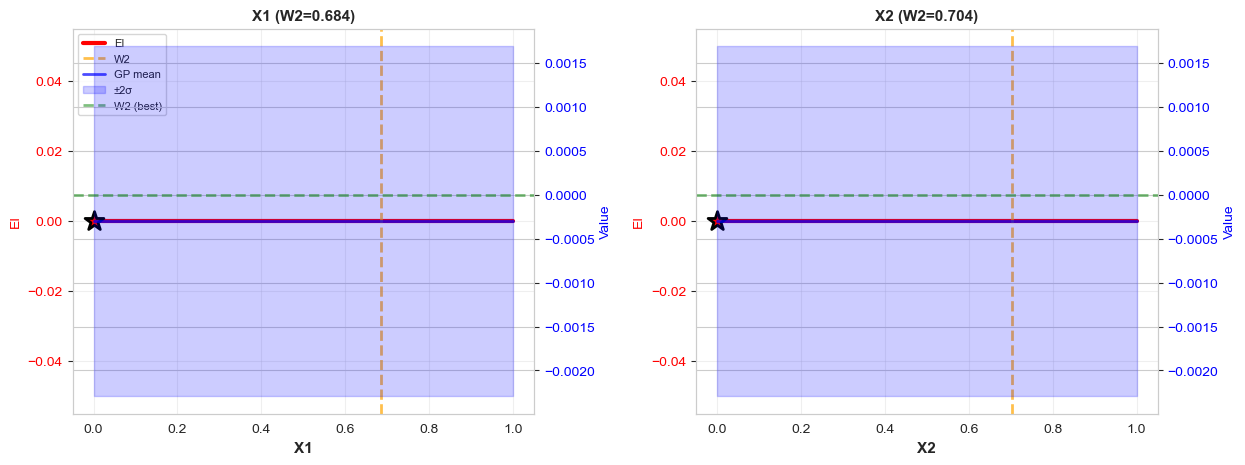

✓ Saved acquisition curves


In [8]:
print('Creating acquisition curves...')

fig = plt.figure(figsize=(14, 5))
gs = fig.add_gridspec(1, 2, hspace=0.35, wspace=0.35)

for dim in range(2):
    ax = fig.add_subplot(gs[0, dim])
    ax2 = ax.twinx()
    
    x1 = np.linspace(0, 1, 200)
    Xt = np.tile(X.mean(axis=0), (200, 1))
    Xt[:, dim] = x1
    
    m, s = gp.predict(Xt, return_std=True)
    e = expected_improvement(Xt, gp, y_best, 0.05)
    
    # GP plot
    ax2.plot(x1, m, 'b-', lw=2, alpha=0.7, label='GP mean')
    ax2.fill_between(x1, m - 2*s, m + 2*s, alpha=0.2, color='blue', label='±2σ')
    ax2.axhline(y_best, color='green', ls='--', alpha=0.5, lw=2, label='W2 (best)')
    ax2.set_ylabel('Value', color='blue', fontsize=10)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # EI plot
    ax.plot(x1, e, 'r-', lw=3, label='EI')
    ax.fill_between(x1, 0, e, alpha=0.3, color='red')
    
    mi = np.argmax(e)
    ax.scatter(x1[mi], e[mi], color='red', s=200, marker='*',
              zorder=5, edgecolors='black', lw=2)
    
    # Mark W2
    ax.axvline(w2_pt[dim], color='orange', ls='--', alpha=0.7, lw=2, label='W2')
    
    ax.set_xlabel(f'X{dim+1}', fontweight='bold', fontsize=11)
    ax.set_ylabel('EI', color='red', fontsize=10)
    ax.set_title(f'X{dim+1} (W2={w2_pt[dim]:.3f})', fontweight='bold', fontsize=11)
    ax.tick_params(axis='y', labelcolor='red')
    ax.set_xlim(-0.05, 1.05)
    ax.grid(alpha=0.3)
    
    if dim == 0:
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=8)

plt.savefig('Capstone_F1_W3_acquisition.png', dpi=150, bbox_inches='tight')
plt.show()
print('✓ Saved acquisition curves')

## RESULTS VISUALIZATION

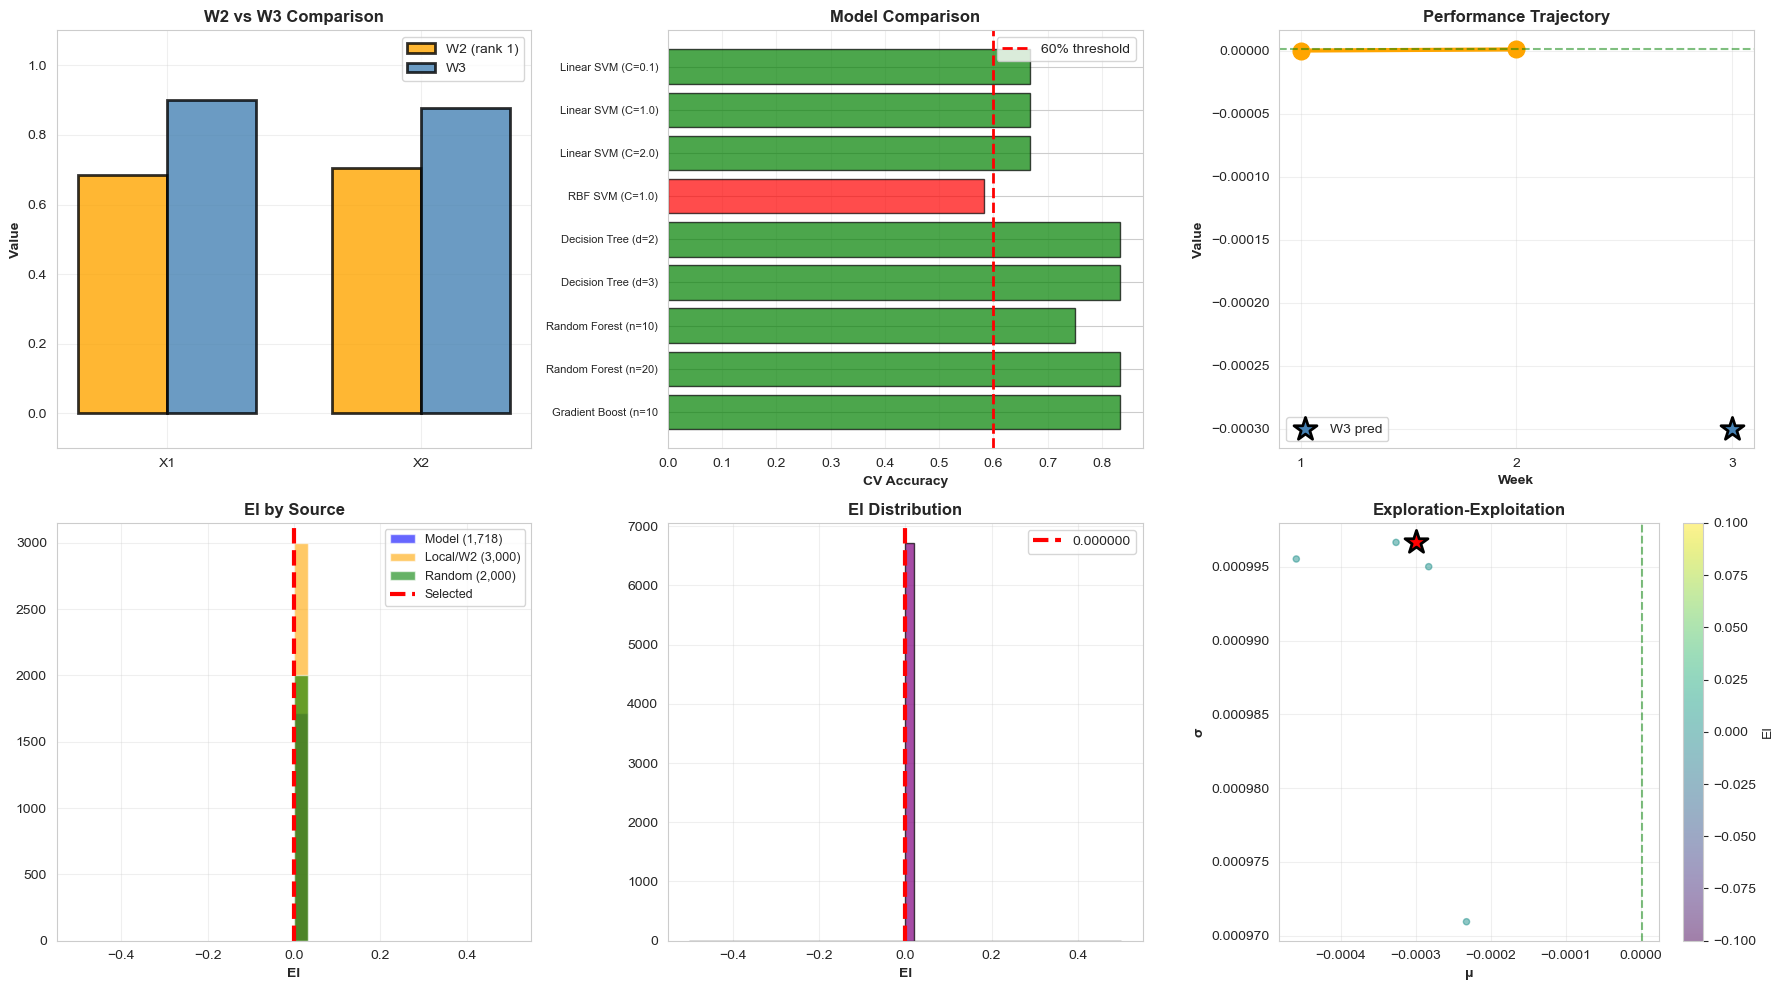

✓ Saved results


In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

dims = np.arange(2)
w = 0.35

# W2 vs W3
ax = axes[0, 0]
ax.bar(dims - w/2, w2_pt, w, label='W2 (rank 1)', alpha=0.8, color='orange', edgecolor='black', lw=2)
ax.bar(dims + w/2, x_next, w, label='W3', alpha=0.8, color='steelblue', edgecolor='black', lw=2)
ax.set_xticks(dims)
ax.set_xticklabels([f'X{i+1}' for i in dims])
ax.set_ylabel('Value', fontweight='bold')
ax.set_title('W2 vs W3 Comparison', fontweight='bold', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)
ax.set_ylim(-0.1, 1.1)

# Model comparison
ax = axes[0, 1]
if results:
    model_names = [r['name'][:20] for r in results]
    model_scores = [r['mean'] for r in results]
    colors_model = ['green' if s >= 0.60 else 'red' for s in model_scores]
    bars = ax.barh(range(len(results)), model_scores, color=colors_model, alpha=0.7, edgecolor='black')
    ax.axvline(0.60, color='red', ls='--', lw=2, label='60% threshold')
    ax.set_yticks(range(len(results)))
    ax.set_yticklabels(model_names, fontsize=8)
    ax.set_xlabel('CV Accuracy', fontweight='bold')
    ax.set_title('Model Comparison', fontweight='bold', fontsize=12)
    ax.legend()
    ax.invert_yaxis()
    ax.grid(alpha=0.3, axis='x')

# Performance trajectory
ax = axes[0, 2]
weeks = [1, 2, 3]
values = [w1_val, w2_val, mu_next]
colors_traj = ['gray', 'orange', 'steelblue']
ax.plot(weeks[:2], values[:2], 'o-', markersize=12, linewidth=3, color='orange')
ax.scatter([3], [mu_next], s=300, marker='*', color='steelblue',
          edgecolors='black', lw=2, zorder=5, label='W3 pred')
ax.axhline(y_best, color='green', ls='--', alpha=0.5)
ax.set_xlabel('Week', fontweight='bold')
ax.set_ylabel('Value', fontweight='bold')
ax.set_title('Performance Trajectory', fontweight='bold', fontsize=12)
ax.set_xticks([1, 2, 3])
ax.legend()
ax.grid(alpha=0.3)

# EI by source
ax = axes[1, 0]
ei_model = ei_values[:len(X_model)]
ei_local = ei_values[len(X_model):len(X_model)+len(X_local)]
ei_rand = ei_values[len(X_model)+len(X_local):]
ax.hist(ei_model, bins=30, alpha=0.6, label=f'Model ({len(ei_model):,})', color='blue')
ax.hist(ei_local, bins=30, alpha=0.6, label=f'Local/W2 ({len(ei_local):,})', color='orange')
ax.hist(ei_rand, bins=30, alpha=0.6, label=f'Random ({len(ei_rand):,})', color='green')
ax.axvline(ei_next, color='red', ls='--', lw=3, label='Selected')
ax.set_xlabel('EI', fontweight='bold')
ax.set_title('EI by Source', fontweight='bold', fontsize=12)
ax.legend(fontsize=9)
ax.grid(alpha=0.3)

# EI distribution
ax = axes[1, 1]
ax.hist(ei_values, bins=50, alpha=0.7, color='purple', edgecolor='black')
ax.axvline(ei_next, color='red', ls='--', lw=3, label=f'{ei_next:.6f}')
ax.set_xlabel('EI', fontweight='bold')
ax.set_title('EI Distribution', fontweight='bold', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)

# Mu vs Sigma
ax = axes[1, 2]
sc = ax.scatter(mu_all, sigma_all, c=ei_values, cmap='viridis', alpha=0.5, s=20)
ax.scatter(mu_next, sigma_next, color='red', s=300, marker='*',
          edgecolors='black', lw=2, zorder=5)
ax.axvline(y_best, color='green', ls='--', alpha=0.5)
ax.set_xlabel('μ', fontweight='bold')
ax.set_ylabel('σ', fontweight='bold')
ax.set_title('Exploration-Exploitation', fontweight='bold', fontsize=12)
plt.colorbar(sc, ax=ax, label='EI')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Capstone_F1_W3_results.png', dpi=150, bbox_inches='tight')
plt.show()
print('✓ Saved results')

## Format Submission

In [10]:
fmt = '-'.join([f'{v:.6f}' for v in x_next])

print('='*80)
print('F1 WEEK 3 SUBMISSION')
print('='*80)
print(f'\n📋 COPY THIS:\n')
print(fmt)
print('\n' + '='*80)

with open('Capstone_F1_W3_submission.txt', 'w', encoding='utf-8') as f:
    f.write(f'F1 WEEK 3\n{"="*80}\n\n{fmt}\n\n')
    f.write(f'Strategy: Model Testing + Local Exploitation\n')
    f.write(f'Best model: {best_model_name}\n')
    if use_model and 'best_model_cv' in locals():
        f.write(f'Model CV: {best_model_cv:.1%}\n')
    f.write(f'Prediction: {mu_next:.8f} +/- {sigma_next:.8f}\n')
    f.write(f'Source: {source}\n')
    f.write(f'Week 2: rank 1 (refining success)\n')

print('✓ Saved submission')
print('\n✓ F1 COMPLETE!')

F1 WEEK 3 SUBMISSION

📋 COPY THIS:

0.901038-0.877039

✓ Saved submission

✓ F1 COMPLETE!
